# Week 3: Jupyter Notebooks and NumPy
(2017-07-18 23:10)

## 3.1. Jupyter Notebooks

### 3.1.1. Why Jupyter Notebooks?
* Documented Data Scienec: Jupyter notebooks allow us to document the process by combining notes, code, and graphics.  
* Reproducible Science: it allows others to view and understand everything, as well as improving collaboration    
* Presentation of Results: we can share the notebook easily  
* It supports Julia, Python, and R, along with many other languages.

### 3.1.2. Jupyter: Getting Started

### 3.1.3. Setting up your system

### 3.1.4. Live Code: Getting Started

In [1]:
print('Hello World!')

Hello World!


In [2]:
365 * 24 * 60 * 60 # how many seconds are in a year

31536000

In [3]:
_ / 1e6 # underscore refers to the output of the previous cell

31.536

In [4]:
x = 4 + 3
print(x)

7


### 3.1.5. Documenting Analysis with Markdown Text

### 3.1.6. Live Code: Documenting Analysis with Markdown Text

# This is a markdown cell

## This is heading 2.

### This is heading 3

Hi!

* One fish
* Two fish
* Red fish
* Blue fish

**bold text**


*italic text*

http://jupyter.org

This is a **Latex** equation:

$\int_0^\infty x^{-\alpha}$

### 3.1.7. Jupyter: Additional Tips

### 3.1.8. Live Code: Additional Tips

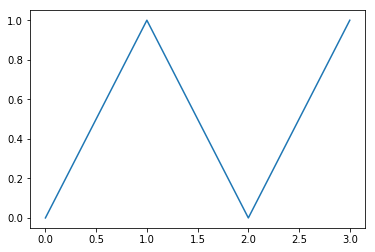

In [5]:
%matplotlib inline
from matplotlib.pyplot import plot

plot([0, 1, 0, 1])

This is a plot using matplotlib of a vector.

We can save and close the browser tab, the kernel running the notebook will continue to run. To prevent this, we can use the 'File -> Close and halt'. We can download the notebook in a number of formats (html, markdown, pdf etc.)

### Live: Using Unix in Jupyter
We simply put an exclamation mark before a command.

In [6]:
# Declare filename:

!ls

count_vs_words	      Week 2.ipynb		Week-3-Numpy.zip
shakespeare.txt       Week-2-UNIXDataFiles	word_cloud
temp.txt	      Week-2-UNIXDataFiles.zip	word_cloud.zip
Week-1-Intro-new.zip  Week 3.ipynb
Week 1.ipynb	      Week-3-Numpy


In [7]:
filename = './shakespeare.txt'
!echo $filename
print(filename)

./shakespeare.txt
./shakespeare.txt


In [8]:
# head:

!head -n 3 $filename

In [9]:
# tail:

!tail -n 10 $filename

In [10]:
# wc:

!wc $filename

 124505  901447 5583442 ./shakespeare.txt


In [11]:
!wc -l $filename

124505 ./shakespeare.txt


In [12]:
# cat:

!cat $filename | wc -l

124505


In [13]:
# grep:

!grep -i 'parchment' $filename

In [14]:
# output matching patten one per line and then count number of lines

!cat $filename | grep -o 'liberty' | wc -l

71


In [15]:
# sed:

# replace all instances of 'parchment' to 'manuscript'

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

## !grep -i 'manuscript' temp.txt

In [16]:
# sort:

!head -n 5 $filename

In [17]:
!head -n 5 $filename | sort

In [18]:
# columns separated by ' ', sort on column 2 (-ks), case insensitive (-f)

!head -n 5 $filename | sort -f -t' ' -k2

In [19]:
!sort $filename | wc -l

124505


In [20]:
# uniq command for getting unique records using -u option

!sort $filename | uniq -u | wc -l

110834


In [21]:
# Count the most frequent words in the text in Unix:

!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$
sort: write failed: 'standard output': Broken pipe
sort: write error


In [22]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15 > count_vs_words

sort: write failed: 'standard output': Broken pipe
sort: write error


In [23]:
!cat count_vs_words

 502289 $
  22678 the$
  19163 I$
  17868 and$
  15324 to$
  15216 of$

  12152 a$
  10614 my$
   9347 in$
   8709 you$
   7662 is$
   7332 that$
   7065 And$
   6737 not$


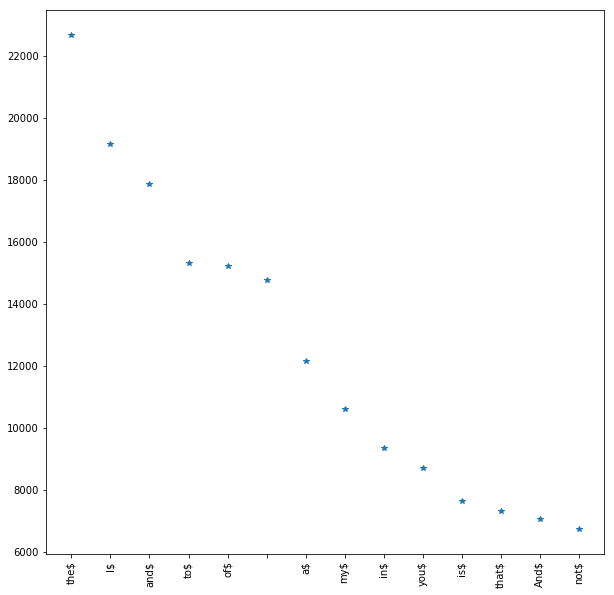

In [24]:
# plot by importing words counts into Python

%matplotlib inline

import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
        
# remove the count of spaces (first line)
y = y[1:]
xTicks = xTicks[1:]

# plot:

x = range(len(y))
plt.figure(figsize = (10, 10))
plt.xticks(x, xTicks, rotation = 90)
plt.plot(x, y, '*')

## 3.2. NumPy

### 3.2.1. Why NumPy
**Key-features**:  
Multi-dimensional arrays, built-in array operations, broadcasting (simplified interactions), integration (C, C++).  
  
**Why NumPy**:  
* Speed: Ndarray are fixed in size (unlike lists which can change), all elements are the same type (lists can hold ints, floats, strings etc.)  
* Functionality: sum/multiply matrices, subset matrices, integration with Pandas and others.  
  
Many packages are built on top of NumPy!

### 3.2.2. NumPy: ndarray basics

Rank 1 ndarray:

In [25]:
import numpy as np

In [26]:
an_array = np.array([3, 33, 333]) # create a rank 1 array
print(type(an_array))             # the type of a ndarray

<class 'numpy.ndarray'>


In [27]:
# test the shape of the array:

an_array.shape

(3,)

In [28]:
# because it's rank 1, we need only one index to access each element:

print(an_array[0], an_array[1], an_array[2])

3 33 333


In [29]:
# arrays are mutable:

an_array[0] = 88
an_array

array([ 88,  33, 333])

In [31]:
# you can't assign a string to a array:

an_array[0] = 'Spam'

ValueError: invalid literal for int() with base 10: 'Spam'

Rank 2 ndarray

In [32]:
another = np.array([[11, 12, 13], [21, 22, 23]]) # rank 2 ndarray
print(another)
print('The shape is:', another.shape)
print('Indexing the elements: ', another[0, 0], another[0, 1], another[1, 0])

[[11 12 13]
 [21 22 23]]
The shape is: (2, 3)
Indexing the elements:  11 12 21


There are many ways to create a ndarray

In [33]:
# a 2x2 ndarray filled with zeros

ex1 = np.zeros((2, 2))
ex1

array([[ 0.,  0.],
       [ 0.,  0.]])

In [34]:
# a 2x2 ndarray filled with 9.0

ex2 = np.full((2, 2), 9.0)
ex2

array([[ 9.,  9.],
       [ 9.,  9.]])

In [35]:
# a 2x2 ndarray filled with a diagonal of 1s and other 0s:

ex3 = np.eye(2, 2)
ex3

array([[ 1.,  0.],
       [ 0.,  1.]])

In [36]:
# a ndarray of 1s:

ex4 = np.ones((1, 2))
ex4

array([[ 1.,  1.]])

In [37]:
# the above array is rank 2:

print(ex4.shape)

#which means we need two indexes to access an element:
print()
print(ex4[0, 1])

(1, 2)

1.0


In [38]:
# ndarray of random float between 0 and 1:

ex5 = np.random.random((2, 2))
ex5

array([[ 0.5902834 ,  0.70214394],
       [ 0.48677465,  0.43616793]])

### 3.2.3. NumPy: ndarray indexing
Similar to slice indexing with lists and strings, we can use it to pull out sub-regions of ndarrrays.

In [39]:
import numpy as np

In [40]:
# rank 2 ndarray of shape (3, 4):

an_array = np.array([[11, 12, 13, 14],
                    [21, 22, 23, 24],
                    [31, 32, 33, 34]])
an_array

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]])

In [41]:
# slice the first 2 rows and 2 columns:
# first value is inclusive, second value exclusive

a_slice = an_array[:2, 1:3]
a_slice

array([[12, 13],
       [22, 23]])

The 'a_slice' has its own indices (different from 'an_array'). When you modify 'a_slice', you actually modify the underlying ndarray, because they are **both pointing to the same object**:

In [42]:
print('Before:', an_array[0, 1])
a_slice[0, 0] = 1000
print('After:', an_array[0, 1])

Before: 12
After: 1000


You can make a copy of another array, so you have two ndarrays pointing to two different objects:

In [43]:
an_array2 = np.array([[11, 12, 13, 14],
                    [21, 22, 23, 24],
                    [31, 32, 33, 34]])

a_slice2 = np.array(an_array2[:2, 1:3]) # THIS IS THE TRICK!!!

print('Before:', an_array2[0, 1])
a_slice2[0, 0] = 1000
print('After:', an_array2[0, 1])

Before: 12
After: 12


Use both integer indexing and slice indexing

In [44]:
an_array2 = np.array([[11, 12, 13, 14],
                    [21, 22, 23, 24],
                    [31, 32, 33, 34]])

row_rank1 = an_array[1, :]        # only 1 row and all columns  (:)(
print(row_rank1, row_rank1.shape) # notice only a single []

[21 22 23 24] (4,)


In [45]:
# slicing alone: generates an array of the same rank as the an_array:

row_rank2 = an_array[1:2, :]      # rank 2 view
print(row_rank2, row_rank2.shape) # notice the [[]]

[[21 22 23 24]] (1, 4)


Array indexing for changing elements:

In [46]:
# create a new array:

an_array = np.array([[11, 12, 13, 14],
                    [21, 22, 23, 24],
                    [31, 32, 33, 34],
                    [41, 42, 43, 44]])

print('Original array:')
an_array

Original array:


array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])

In [47]:
# create an array of indices:

col_indices = np.array([0, 1, 2, 0])
print('\nCol indices picked:', col_indices)

row_indices = np.arange(4)
print('\nRow indices picked:', row_indices)


Col indices picked: [0 1 2 0]

Row indices picked: [0 1 2 3]


In [48]:
# examine the pairings of row_indices and col_indices:

for row, col in zip(row_indices, col_indices):
    print(row, ', ', col)

0 ,  0
1 ,  1
2 ,  2
3 ,  0


In [49]:
# select one element from each row:

print('Values in the an_array at those indices:\n', an_array[row_indices, col_indices])

Values in the an_array at those indices:
 [11 22 33 41]


In [50]:
# change one element from each row using the indices selected:

an_array[row_indices, col_indices] += 1000

print('Changed array:\n', an_array)

Changed array:
 [[1011   12   13   14]
 [  21 1022   23   24]
 [  31   32 1033   34]
 [1041   42   43   44]]


### 3.2.4. NumPy: ndarray boolean indexing

In [51]:
# create a 3x2 ndarray:

an_array = np.array([[11, 12], [21, 22], [31, 32]])
an_array

array([[11, 12],
       [21, 22],
       [31, 32]])

In [52]:
# create a filter which will be a boolean:

filter1 = (an_array > 15)
filter1

array([[False, False],
       [ True,  True],
       [ True,  True]], dtype=bool)

Notice the filter has the same shape as the original ndarray, but filled with True and False according to the result of the boolean logic.

In [53]:
# we can now select just those elements which meet that criteria
an_array[filter1]

array([21, 22, 31, 32])

In [54]:
# for short, we could directly used this approach without creating a new object:

an_array[an_array > 15]

array([21, 22, 31, 32])

In [55]:
# greater than 20 and less than 30:

an_array[(an_array > 20) & (an_array < 30)]

array([21, 22])

In [56]:
# only even values:

an_array[an_array % 2 == 0]

array([12, 22, 32])

We can actually change the values based on some filter:

In [57]:
an_array[an_array % 2 == 0] += 100
an_array

array([[ 11, 112],
       [ 21, 122],
       [ 31, 132]])

### 3.2.5. NumPy: ndarray Datatypes and Operations

In [58]:
import numpy as np

In [59]:
ex1 = np.array([11, 22]) # dtype is inferred as int64
ex1.dtype

dtype('int64')

In [60]:
ex2 = np.array([11.0, 12.0]) # dtype is inferred as float64
ex2.dtype

dtype('float64')

In [61]:
ex3 = np.array([11, 21], dtype = np.int64) # "force" the dtype as int64
ex3.dtype

dtype('int64')

In [62]:
ex5 = np.array([11, 21], dtype = np.float64) # "force" the dtype as float64
print(ex5.dtype)
print()
print(ex5)

float64

[ 11.  21.]


Arithmetic Array Operations

In [63]:
x = np.array([[111, 112], [121, 122]], dtype = np.int)
y = np.array([[211.1, 212.1], [221.1, 222.1]], dtype = np.float64)

print(x, '\n\n', y)

[[111 112]
 [121 122]] 

 [[ 211.1  212.1]
 [ 221.1  222.1]]


In [64]:
# add

print(x + y, '\n\n', np.add(x, y))

[[ 322.1  324.1]
 [ 342.1  344.1]] 

 [[ 322.1  324.1]
 [ 342.1  344.1]]


In [65]:
# subtract

print(x - y, '\n\n', np.subtract(x, y))

[[-100.1 -100.1]
 [-100.1 -100.1]] 

 [[-100.1 -100.1]
 [-100.1 -100.1]]


In [66]:
# multiply

print(x * y, '\n\n', np.multiply(x, y))

[[ 23432.1  23755.2]
 [ 26753.1  27096.2]] 

 [[ 23432.1  23755.2]
 [ 26753.1  27096.2]]


In [67]:
# divide

print(x / y, '\n\n', np.divide(x, y))

[[ 0.52581715  0.52805281]
 [ 0.54726368  0.54930212]] 

 [[ 0.52581715  0.52805281]
 [ 0.54726368  0.54930212]]


In [68]:
# square root

np.sqrt(x)

array([[ 10.53565375,  10.58300524],
       [ 11.        ,  11.04536102]])

In [69]:
# exponent (e ** x)

np.exp(x)

array([[  1.60948707e+48,   4.37503945e+48],
       [  3.54513118e+52,   9.63666567e+52]])

### 3.2.6. NumPy: Statistical, Sorting and Set Operations

In [70]:
# setup a random 2x4 matrix

arr = 10 * np.random.randn(2, 5)
print(arr)

[[  3.8469235    3.7911226    3.99024488   3.07115218   1.85514902]
 [-23.34216714   4.43488019 -12.93344486   1.2985727    8.10960011]]


In [71]:
# mean for all elements

arr.mean()

-0.58779668199001045

In [72]:
# mean by row

arr.mean(axis = 1) # axis = 1 means calculate by row (axis = 1 is for column)

array([ 3.31091844, -4.4865118 ])

In [73]:
# mean by column

arr.mean(axis = 0)

array([-9.74762182,  4.11300139, -4.47159999,  2.18486244,  4.98237456])

In [74]:
# sum all elements

arr.sum()

-5.8779668199001041

In [75]:
# median by column

np.median(arr, axis = 0)

array([-9.74762182,  4.11300139, -4.47159999,  2.18486244,  4.98237456])

Sorting

In [76]:
# create a 10 element array of randoms

unsorted = np.random.randn(10)
unsorted

array([-0.5497472 ,  0.36310535, -0.68827437, -0.23370217, -2.46601364,
       -1.20890416,  0.06640181, -0.0667975 ,  2.10128554, -0.12253205])

In [77]:
# create a copy of the unsorted array and sort it:

sorted1 = np.array(unsorted)
sorted1.sort()

print(sorted1, '\n\n', unsorted)

[-2.46601364 -1.20890416 -0.68827437 -0.5497472  -0.23370217 -0.12253205
 -0.0667975   0.06640181  0.36310535  2.10128554] 

 [-0.5497472   0.36310535 -0.68827437 -0.23370217 -2.46601364 -1.20890416
  0.06640181 -0.0667975   2.10128554 -0.12253205]


Finding Unique Elements

In [78]:
array = np.array([1, 2, 1, 4, 2, 1, 4, 2])
np.unique(array)

array([1, 2, 4])

Set Operations with np.array data type

In [79]:
s1 = np.array(['desk', 'chair', 'bulb'])
s2 = np.array(['lamp', 'bulb', 'chair'])
print(s1, s2)

['desk' 'chair' 'bulb'] ['lamp' 'bulb' 'chair']


In [80]:
np.intersect1d(s1, s2)

array(['bulb', 'chair'], 
      dtype='<U5')

In [81]:
np.union1d(s1, s2)

array(['bulb', 'chair', 'desk', 'lamp'], 
      dtype='<U5')

In [82]:
# elements in s1 that are not in s2

np.setdiff1d(s1, s2)

array(['desk'], 
      dtype='<U5')

In [83]:
# element of s1 is also in s2

np.in1d(s1, s2)

array([False,  True,  True], dtype=bool)

### 3.2.7. NumPy: Broadcasting
"When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions. and works its way forward. Two dimensions are compatible when:

1. they are equal or
2. one of them is 1"

In [84]:
start = np.zeros((4, 3))
start

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [85]:
# create a rank 1 ndarray with 3 values

add_rows = np.array([1, 0, 2])
add_rows

array([1, 0, 2])

In [86]:
# row broadcasting

start + add_rows

array([[ 1.,  0.,  2.],
       [ 1.,  0.,  2.],
       [ 1.,  0.,  2.],
       [ 1.,  0.,  2.]])

In [87]:
# column broadcasting

add_cols = np.array([[0, 1, 2, 3]]).T
print(add_cols, '\n\n', add_cols + start)

[[0]
 [1]
 [2]
 [3]] 

 [[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]


In [88]:
# broadcasting in both dimensions:

add_scalar = np.array([1])
print(start + add_scalar)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


### 3.2.8. NumPy: speed test ndarray vs list

In [89]:
from numpy import arange
from timeit import Timer

size = 1000000
timeits = 1000

In [90]:
#  create the ndarray with values 0, 1, 2, ..., size-1

nd_array = arange(size)
print(type(nd_array))

<class 'numpy.ndarray'>


In [91]:
# timer expects the operations as a parameter,
# here we pass nd_array.sum()

%time

nd_array.sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


499999500000

In [92]:
# create the list with values 0, 1, 2, ..., size-1

a_list = list(range(size))
print(type(a_list))

<class 'list'>


In [93]:
%time

sum(a_list)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs


499999500000

## 3.3. Satellite Image Application in NumPy

### 3.3.1. Satellite Image Example
WIFIRE is an integrated system for wildfire analysis which is capable of handling changing urban dynamics and climate. The website http://www.landfire.gov/ provides data on earth surface. Each image is formed by many pixels, a pixel is a square which doesn't vary its color. We can represent a pixel's color by three 8-bit numbers (from 0 to 255) representing the Red, Green and Blue. For example, Black is (0, 0, 0), White is (255, 255, 255), Red is (255, 0, 0), Green is (0, 255, 0), and Blue is (0, 0, 255).

### 3.3.2. (Optional) WIFIRE Overview

### 3.3.3. Live Code: Satellite Example Part A

In [94]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [95]:
from skimage import data
photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
type(photo_data)

numpy.ndarray

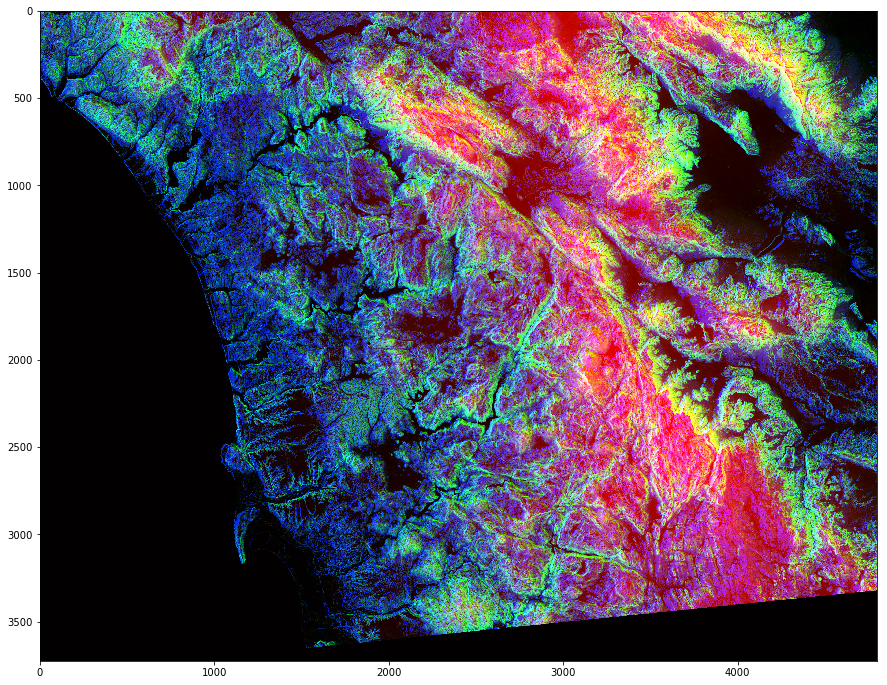

In [96]:
plt.figure(figsize = (15, 15))
plt.imshow(photo_data)

In [97]:
photo_data.shape

(3725, 4797, 3)

The first two numbers are the length and the width, and the third number (i.e. 3) is for the three layers: Red, Green and Blue. The Red pixels indicates Altitude, the Blue indicates Aspect and the Green indicates Slope. The higher the intensity of the color the higher the altitude, aspect and slope.

In [98]:
photo_data.size

53606475

In [99]:
photo_data.min(), photo_data.max()

(0, 255)

In [100]:
photo_data.mean()

75.829935450894695

In [101]:
# pixel on the 150th row and 250th column

photo_data[150, 250]

array([ 17,  35, 255], dtype=uint8)

In [102]:
# only the green values

photo_data[150, 250, 1]

35

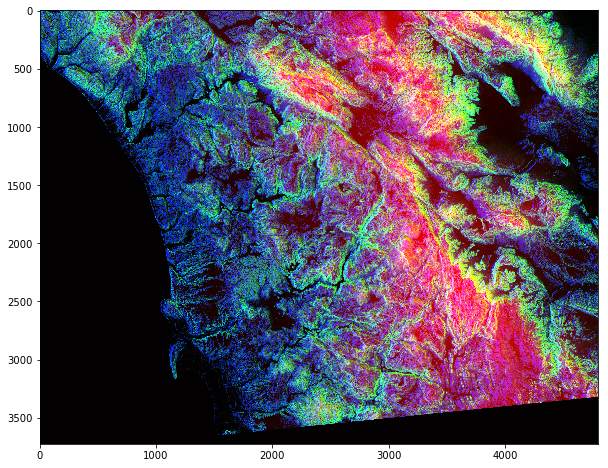

In [103]:
# set a pixel to all zeros and show image (doesn't change much)

photo_data[150, 250] = 0
plt.figure(figsize = (10, 10))
plt.imshow(photo_data)

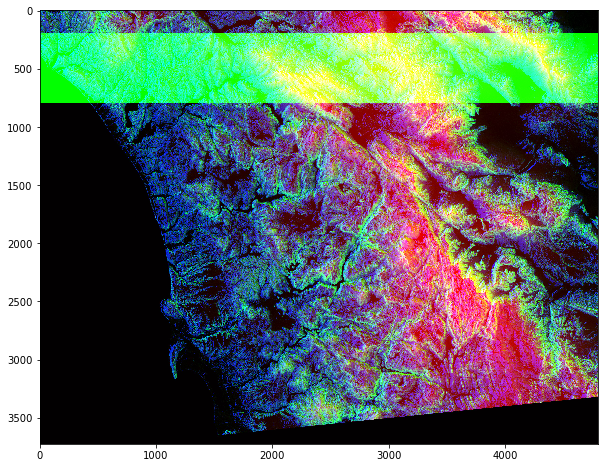

In [104]:
# set the green layer for rows 200 to 800 to full intensity

photo_data[200:800, :, 1] = 255
plt.figure(figsize = (10, 10))
plt.imshow(photo_data)

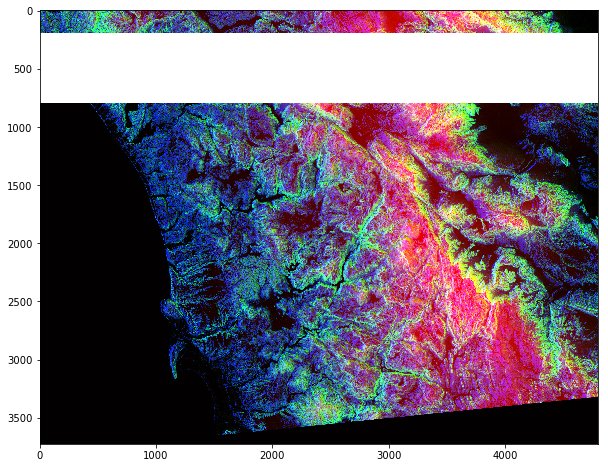

In [105]:
# set all layers for rows 200 to 800 to full intensity (white)

photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')

photo_data[200:800, :] = 255
plt.figure(figsize = (10, 10))
plt.imshow(photo_data)

In [106]:
# pick all pixels with low values

photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
print('Original shape:', photo_data.shape)
low_value_filter = photo_data < 200
print('Low value filter shape:', low_value_filter.shape)

Original shape: (3725, 4797, 3)
Low value filter shape: (3725, 4797, 3)


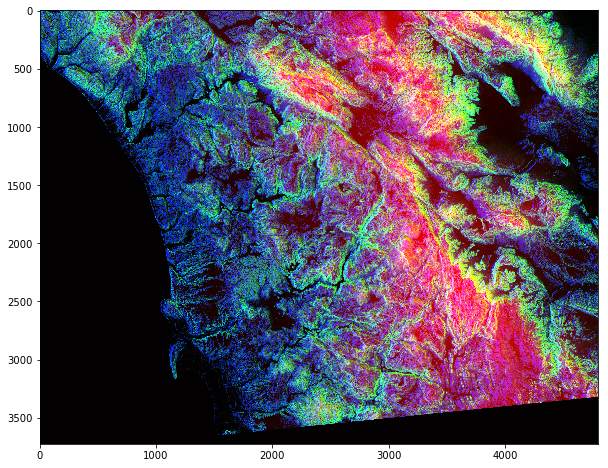

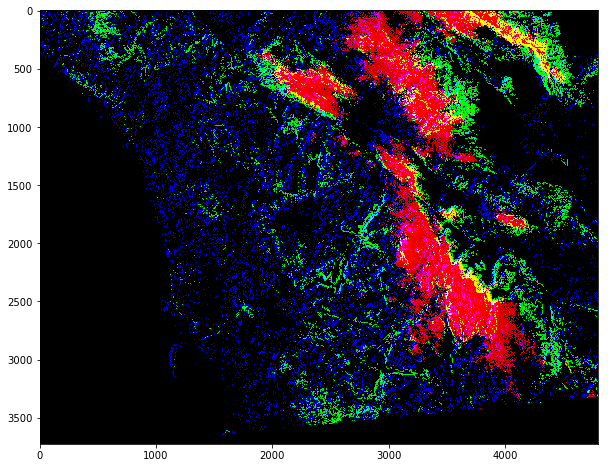

In [107]:
# filtering out low values

plt.figure(figsize = (10, 10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize = (10, 10))
plt.imshow(photo_data)

In [108]:
# more row and column operations

rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


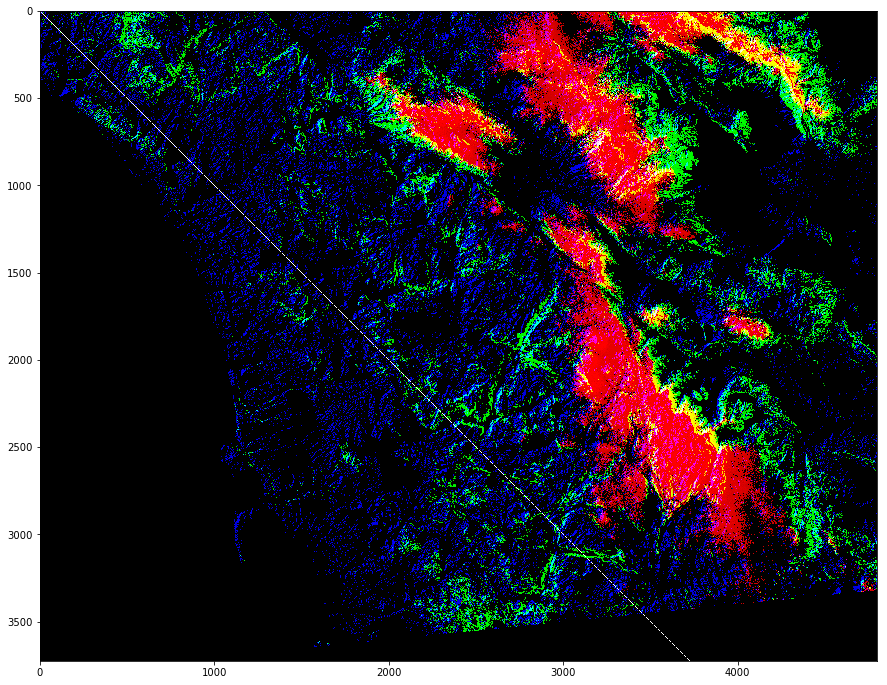

In [109]:
photo_data[rows_range, cols_range] = 255

plt.figure(figsize = (15, 15))
plt.imshow(photo_data)

### 3.3.4. Live Code: Satellite Example Part B

In [110]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [111]:
photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')

total_rows, total_cols, total_layers = photo_data.shape

# compact method for creating a multidimensional ndarray operations in single lines:
X, Y = np.ogrid[: total_rows, : total_cols]
print('X shape is', X.shape, 'Y shape is', Y.shape)

X shape is (3725, 1) Y shape is (1, 4797)


In [112]:
# calculate the center point
center_row, center_col = total_rows / 2, total_cols / 2

# distance from the center
dist_from_center = (X - center_row) ** 2 + (Y - center_col) ** 2

# radius
radius = (total_rows / 2) ** 2

# mask
circular_mask = (dist_from_center > radius)

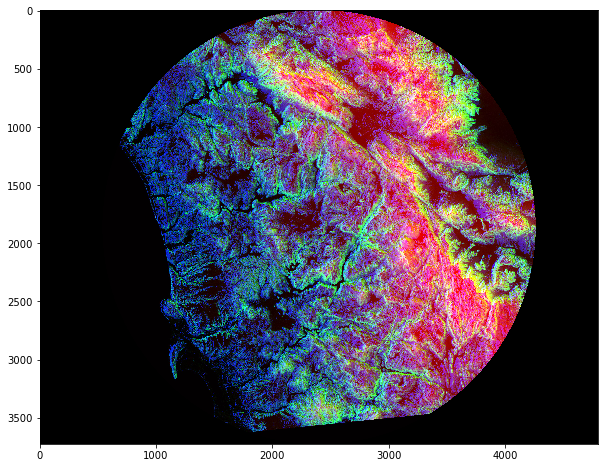

In [113]:
photo_data[circular_mask] = 0
plt.figure(figsize = (10, 10))
plt.imshow(photo_data)

Further masking: let's get just the upper half disc

In [114]:
X, Y  = np.ogrid[: total_rows, : total_cols]
half_upper = X < center_row # generates a mask for all rows above center
half_upper_mask = np.logical_and(half_upper, circular_mask)

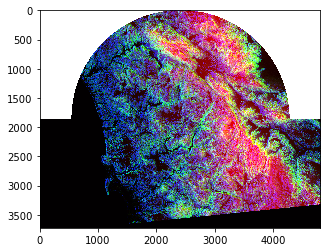

In [115]:
photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
photo_data[half_upper_mask] = 255
plt.imshow(photo_data)

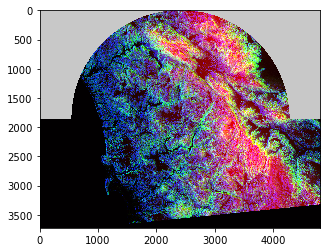

In [116]:
import random

photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
photo_data[half_upper_mask] = random.randint(200, 255)
plt.imshow(photo_data)

Let's try to highlight all the high altitude areas by detecting the high intensity Red pixels and muting down other areas

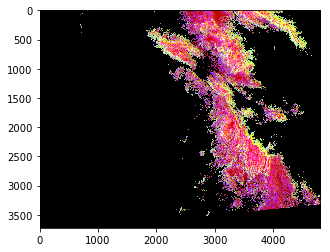

In [117]:
photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
red_mask = photo_data[:, :, 0] < 150
photo_data[red_mask] = 0
plt.imshow(photo_data);

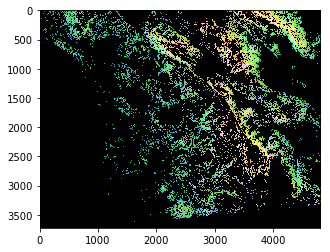

In [118]:
# the same as before but for the Green pixels

photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
green_mask = photo_data[:, :, 1] < 150
photo_data[green_mask] = 0
plt.imshow(photo_data);

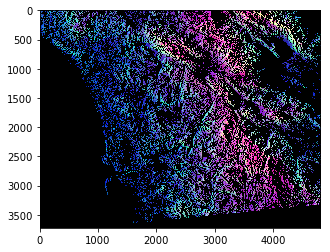

In [119]:
# the same as before but for the Blue pixels

photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')
green_mask = photo_data[:, :, 2] < 150
photo_data[green_mask] = 0
plt.imshow(photo_data);

Composite mask for all three layers

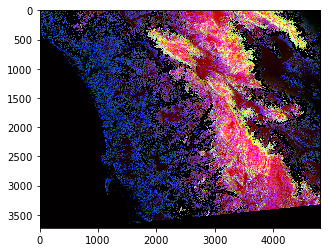

In [120]:
photo_data = misc.imread('/home/jayme/Courses/Python4DS/Week-3-Numpy/wifire/sd-3layers.jpg')

red_mask = photo_data[:, :, 0] < 150
green_mask = photo_data[:, :, 1] > 100
blue_mask = photo_data[:, :, 2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 0

plt.imshow(photo_data);

## 3.4. Week 3: Assessment

(2017-07-25 15:13)